<a href="https://colab.research.google.com/github/kkobug222/python/blob/main/tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#파일 불러오기
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Tree_Data.csv', encoding ='cp949')
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [ ]:
#결측치 확인하기
df.isnull().sum()

,0
No,0
Plot,0
Subplot,0
Species,0
Light_ISF,0
Light_Cat,0
Core,0
Soil,0
Adult,0
Sterile,0


In [ ]:
# 선택한 9개 변수 + 타겟 변수('Alive')
#Light_ISF(빛 투과율), Light_Cat빛 조건, AMF뿌리와의 공생데이터, EMF균류관련 데이터, Phenolics방어물질, 'Lignin'목질화 정도, 'NSC'비구조 탄소저장 , 'Time'생존기간,'Event'시간경과 변수, Alive생존여부
selected_columns = ['Light_ISF', 'Light_Cat', 'AMF', 'EMF','Phenolics', 'Lignin', 'NSC', 'Time', 'Event', 'Alive']

# 선택된 컬럼만 남기기
df_selected = df[selected_columns].copy()

# 'Alive' 컬럼: 생존 여부 → 1(생존), 0(죽음)으로 변환
# 'X'는 생존, 결측 또는 NaN은 죽음으로 간주
df_selected['Alive'] = df_selected['Alive'].apply(lambda x: 1 if x == 'X' else 0)

# 'Light_Cat'은 범주형 변수이므로 숫자로 인코딩
light_map = {'Low': 0, 'Med': 1, 'High': 2}
df_selected['Light_Cat'] = df_selected['Light_Cat'].map(light_map)

# 나머지 수치형 컬럼들도 실수형으로 변환
numeric_cols = ['Light_ISF', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Time', 'Event']
df_selected[numeric_cols] = df_selected[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 결측치 제거
df_selected = df_selected.dropna()

df_selected.head()

,Light_ISF,Light_Cat,AMF,EMF,Phenolics,Lignin,NSC,Time,Event,Alive
1,0.106,1,15.82,31.07,5.19,20.52,19.29,115.5,0.0,1
2,0.106,1,24.45,28.19,3.36,24.74,15.01,63.0,1.0,0
6,0.108,1,24.00,20.00,5.11,18.82,22.51,24.5,0.0,0
7,0.108,1,4.00,0.00,3.43,25.22,14.81,24.5,0.0,0
8,0.108,1,28.74,36.18,3.83,26.65,14.65,115.5,0.0,1


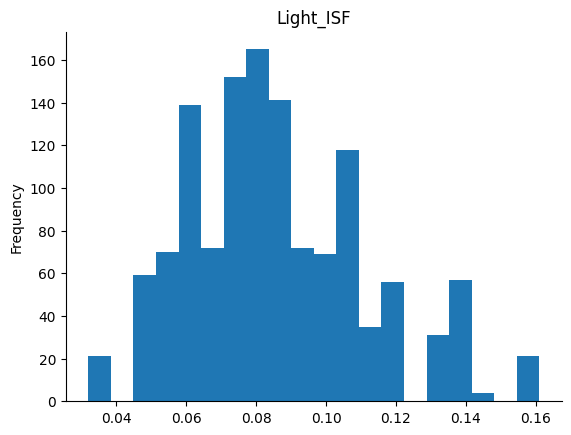

In [ ]:
from matplotlib import pyplot as plt
df_selected['Light_ISF'].plot(kind='hist', bins=20, title='Light_ISF')
plt.gca().spines[['top', 'right',]].set_visible(False)

#의사결정 트리 모델 만들기**

In [ ]:

from sklearn.model_selection import train_test_split

# 종속 변수(Y): 생존 여부
Y = df_selected['Alive']

# 독립 변수(X): Alive 컬럼을 제외한 나머지
X = df_selected.drop(columns=['Alive'])

# 7:3 비율로 훈련/테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2,random_state=42 ) # 클래스 비율 유지

# 데이터 분할 결과 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (1025, 9)
X_test shape: (257, 9)
Y_train shape: (1025,)
Y_test shape: (257,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
#테스트 데이터 예측
dt_prediction=dt.predict(X_test)

In [ ]:
#예측값과 실제 값을 비교해 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,dt_prediction)

1.0

In [ ]:
#혼동 행렬과 평가 결과 확인
from sklearn.metrics import confusion_matrix, classification_report
print('혼동행렬\n',confusion_matrix(Y_test,dt_prediction))
print('\n평가 지표\n',classification_report(Y_test,dt_prediction))

혼동행렬
 [[242   0]
 [  0 143]]

평가 지표
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00       143

    accuracy                           1.00       385
   macro avg       1.00      1.00      1.00       385
weighted avg       1.00      1.00      1.00       385



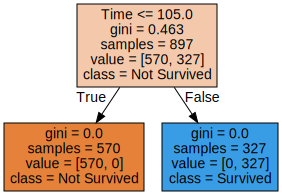

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
df_dot_data=export_graphviz(dt,out_file=None,
                            class_names=["Not Survived","Survived"],
                            feature_names=X_train.columns,
                            impurity=True,
                            filled=True)
graph=graphviz.Source(df_dot_data)
graph

In [ ]:
#랜덤포레스트 모델 정의
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#의사결정 트리 테스트
rf_prediction=rf.predict(X_test)

In [ ]:
#정확도 출력
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,rf_prediction)

1.0

In [ ]:
#랜덤 포레스트 평가
from sklearn.metrics import confusion_matrix, classification_report
print('혼동행렬\n',confusion_matrix(Y_test,rf_prediction))
print('\n평가 지표\n',classification_report(Y_test,rf_prediction))

혼동행렬
 [[154   0]
 [  0 103]]

평가 지표
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       103

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

